In [1]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [2]:
# Installing Kaggle API client
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing files from Google Colab
from google.colab import files
files.upload()

# Creating a directory for Kaggle files
!mkdir ~/.kaggle

# Copying the Kaggle API key file to the created directory
!cp kaggle.json ~/.kaggle/

# Changing the permissions of the Kaggle API key file
!chmod 600 ~/.kaggle/kaggle.json

# Listing available Kaggle datasets
!kaggle datasets list

# Downloading the Jigsaw Toxic Comment Classification Challenge dataset
!kaggle datasets download -d 'julian3833/jigsaw-toxic-comment-classification-challenge'

# Creating a directory to extract the downloaded dataset
!mkdir train

Saving kaggle.json to kaggle.json
ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6487        246  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2276         59  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2387         48  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products S

In [4]:
# Extracting the contents of the downloaded dataset to the created directory
!unzip jigsaw-toxic-comment-classification-challenge.zip -d train

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/test_labels.csv   
  inflating: train/train.csv         


In [5]:
# Reading the train.csv file into a dataframe
df = pd.read_csv("/content/train/train.csv")

# Printing the first few rows of the dataframe
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
# Printing the column names of the dataframe
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
# Separating the comment_text column as the input feature X and the toxicity labels as the output feature y
X = df['comment_text']
y= df[df.columns[2:]].values

# Printing values of X and y
X,y

(0         Explanation\nWhy the edits made under my usern...
 1         D'aww! He matches this background colour I'm s...
 2         Hey man, I'm really not trying to edit war. It...
 3         "\nMore\nI can't make any real suggestions on ...
 4         You, sir, are my hero. Any chance you remember...
                                 ...                        
 159566    ":::::And for the second time of asking, when ...
 159567    You should be ashamed of yourself \n\nThat is ...
 159568    Spitzer \n\nUmm, theres no actual article for ...
 159569    And it looks like it was actually you who put ...
 159570    "\nAnd ... I really don't think you understand...
 Name: comment_text, Length: 159571, dtype: object,
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Preprocessing the data

In [8]:
# Specifying the maximum number of words in the vocabulary
MAX_FEATURES=200000

In [9]:
# Creating a TextVectorization layer with the specified parameters
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode="int")

In [10]:
# Adapting the layer to the input data X
vectorizer.adapt(X.values)

In [11]:
# Printing the words in the vocabulary
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [12]:
# Testing the TextVectorization layer by applying it to a sample text
vectorizer("Hello world")

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288, 263,   0, ...,   0,   0,   0])>

In [13]:
# Vectorizing the entire input feature X using the TextVectorization layer
vectorized_text = vectorizer(X.values)

# Printing vectorized_text
print(vectorized_text)

tf.Tensor(
[[  645    76     2 ...     0     0     0]
 [    1    54  2489 ...     0     0     0]
 [  425   441    70 ...     0     0     0]
 ...
 [32445  7392   383 ...     0     0     0]
 [    5    12   534 ...     0     0     0]
 [    5     8   130 ...     0     0     0]], shape=(159571, 1800), dtype=int64)


In [14]:
# MCSHBAP - map,cache,shuffle,batch,prefetch,from_tensor_slices,list_file

# Creating a TensorFlow dataset from the vectorized text and target values
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))

# Caching the dataset to memory for faster access
dataset = dataset.cache()

# Shuffling the dataset with a buffer size of 160000
dataset = dataset.shuffle(160000)

# Grouping the dataset into batches of 16
dataset = dataset.batch(16)

# Prefetching 8 batches to help reduce bottlenecks
dataset  = dataset.prefetch(8)

In [15]:
# Extracting the first batch of features and labels from the dataset
batch_X,batch_y = dataset.as_numpy_iterator().next()

In [16]:
# Printing the shape of the feature and label batches
batch_X.shape, batch_y.shape

((16, 1800), (16, 6))

In [17]:
# Splitting the dataset into training, validation, and test sets
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [18]:
# Creating a generator for the training set
train_generator = train.as_numpy_iterator()

# Extracting the first batch of features and labels from the training set
train_generator.next()

(array([[   18,     8,   161, ...,     0,     0,     0],
        [  167,     4,     1, ...,     0,     0,     0],
        [  387,    13, 51635, ...,     0,     0,     0],
        ...,
        [   15,   678,    11, ...,     0,     0,     0],
        [   76,  8063,  1004, ...,     0,     0,     0],
        [10929,    23,   319, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Create Sequential Model

In [19]:
# Creating a Sequential model
model = Sequential()

# Adding an Embedding layer with 32 output dimensions
model.add(Embedding(MAX_FEATURES+1,32))

# Adding a Bidirectional LSTM layer with 32 output dimensions and hyperbolic tangent activation function
model.add(Bidirectional(LSTM(32,activation="tanh")))

# Adding two fully connected Dense layers with 128 and 256 output dimensions and rectified linear unit activation function
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))

# Adding another Dense layer with 128 output dimensions and rectified linear unit activation function
model.add(Dense(128,activation="relu"))

# Adding a final Dense layer with 6 output units and sigmoid activation function
model.add(Dense(6,activation="sigmoid"))

In [20]:
# Compiling the model with BinaryCrossentropy loss and Adam optimizer
model.compile(loss="BinaryCrossentropy",optimizer="Adam")

In [21]:
# Printing the summary of the compiled model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [22]:
# Fitting the model on the training data for 5 epochs and validating on the validation data
history = model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 766s 108ms/step - loss: 0.0627 - val_loss: 0.0461


In [23]:
# Importing the matplotlib library for visualization
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

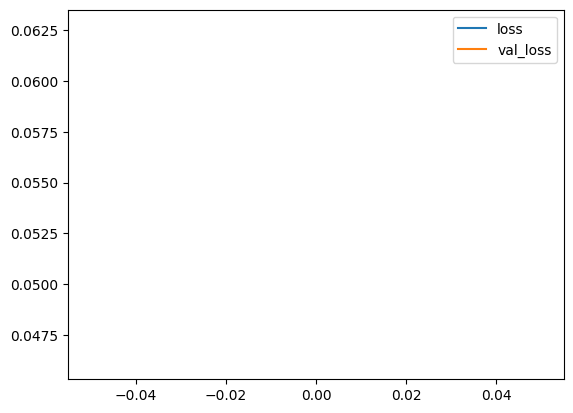

In [24]:
# Creating a figure with size 8x5
plt.figure(figsize=(8,5))

# Plotting the history of training and validation losses and metrics
pd.DataFrame(history.history).plot()

# Displaying the plot
plt.show()

# Make Predictions

In [25]:
# Creating an input_text variable with a sample text to make predictions on
input_text = vectorizer("You freaking suck!")

In [26]:
# Getting a batch of test data to make predictions on
batch = test.as_numpy_iterator().next()

In [27]:
# Making predictions on the batch of test data
res = model.predict(batch_X)

1/1 [==============================] - 1s 729ms/step


In [28]:
# Getting a batch of test data to evaluate the model on
batch_X,batch_y = test.as_numpy_iterator().next()

# Making binary predictions on the batch of test data
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 63ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Evaluate the model

In [29]:
# Creating instances of the metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [30]:
# Iterate through the batches of test data
for batch in test.as_numpy_iterator():
  # Unpack the batch
  X_true,y_true = batch

  # Make a prediction using the model
  yhat = model.predict(X_true)

  # Flatten the predictions and true values
  y_true = y_true.flatten()
  yhat = yhat.flatten()
  
  # Update the precision, recall, and accuracy metrics
  pre.update_state(y_true,yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 53ms/step


In [31]:
# Print the precision, recall, and accuracy results
print(f'Precision : {pre.result().numpy()}, Recall : {re.result().numpy()}, Accuracy : {acc.result().numpy()}')

Precision : 0.8922432065010071, Recall : 0.5920979380607605, Accuracy : 0.46339017152786255


# Test and Gradio

In [32]:
# Install Gradio and Jinja2 using pip
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5

In [33]:
# Import Gradio as gr
import gradio as gr

In [34]:
# Save the model as an h5 file
model.save("toxicity.h5")

In [35]:
# Load the saved model
model = tf.keras.models.load_model('/content/toxicity.h5')

In [36]:
# Get the input string to test the model
input_str = vectorizer('Hi! I am back again! Last warning! Stop undoing my edits or die!')

In [37]:
# Get the prediction result from the model
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 670ms/step


In [38]:
# Get the column names of the dataframe
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [39]:
# Printing the vaues of res
res

array([[0.39185017, 0.00405885, 0.09645269, 0.00657822, 0.09483191,
        0.02228155]], dtype=float32)

In [40]:
# Define a function to score a comment
def score_comment(comment):
  # Vectorize the comment using the vectorizer
  vectorized_comment = vectorizer([comment])
    
  # Get the prediction results from the model
  results = model.predict(vectorized_comment)
    
  # Create a string to return the prediction results for each class
  text = ''
  for idx,col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col,results[0][idx]>0.5)
  
  return text

In [41]:
# Test the score_comment function with a sample comment
score_comment("Hi! I am back again! Last warning! Stop undoing my edits or die!")

1/1 [==============================] - 0s 53ms/step


'toxic: False\nsevere_toxic: False\nobscene: False\nthreat: False\ninsult: False\nidentity_hate: False\n'

In [42]:
# Create a Gradio interface for the score_comment function
interface = gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder="Comment to score"),outputs="text")

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [43]:
# Launch the Gradio interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1935717fe27c194e68.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
